In [1]:
# Main libraries

import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore");

RAND = 10

#  Data import

## Description of the initial project data 

The data for this project was obtained by parsing the site www.bienici.com - a French site for finding real estate for buying / renting apartments in France.
My request was only for apartments to buy in Paris.
The data was obtained by requesting the site's hidden API, so it contains a large number of features that are not informative for my project (about the parameters for displaying an ad on the site for example) that require filtering.

### "Obviously superfluous" features isolation and removal 

In [2]:
df = pd.read_csv('../data/raw/bienici_data(1-105).csv')

In [3]:
df

,Unnamed: 0,city,postalCode,id,adType,propertyType,reference,description,title,publicationDate,...,enclosedParkingQuantity,hasParquet,hasGarage,indoorParkingQuantity,is3dHighlighted,isInStudentResidence,pdf,POSPostalCode,hasEnclosedParking,hasUnobstructedView
0,0,Paris 14e,75014,ag750524-356504104,buy,flat,DFM3970ES,Alésia - Porte d'Orléans: Au 1er étage avec as...,Paris XIVème: Appartement familial exposé Sud ...,2022-08-31T14:07:03.949Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Paris 13e,75013,ag755464-362778145,buy,flat,DFA1401,Butte aux Cailles : Au 6ème étage avec ascense...,Paris XIII - Appartement familial avec balcons,2022-10-16T09:37:12.454Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Paris 7e,75007,apimo-7514240,buy,flat,IFVA0045336,Bienvenue chez Abriculteurs.\nVous trouverez i...,PARIS 7 / GROS CAILLOU - APPARTEMENT- 2 PIECES...,2022-10-14T11:42:22.978Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Paris 14e,75014,ag750524-359345338,buy,flat,DFM3885ES,Secteur Alésia : Situé dans un immeuble de trè...,PARIS XIV - ALESIA - APPARTEMENT FAMILIAL 5 PI...,2022-09-21T17:55:00.771Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Paris 14e,75014,ag750523-357461143,buy,flat,DFG2728ES,"A proximité de la gare Montparnasse, apparteme...",3 pièces - Montparnasse Paris XIV,2022-09-07T18:12:02.970Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,2491,Paris 7e,75007,iad-france-1223625,buy,flat,1194089-3,"iad France - Coulibaly Bidia (<span class=""imp...",Vente Appartement 4 pièces,2022-10-05T23:53:57.761Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2492,2492,Paris 11e,75011,adapt-immo-75034728,buy,flat,75034728,3 Pièces en dernier étage avec vue dégagée. <b...,Appartement,2022-10-05T21:44:02.655Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2493,2493,Paris 15e,75015,ag340369-361289362,buy,flat,340938925187,l Nicolas RENOULT l Conseiller immobilier - Ca...,Appartement 2 pièces Paris 15,2022-10-05T21:13:56.723Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2494,2494,Paris 13e,75013,ag750129-353311939,buy,flat,116725,75013 - COMME UN REZ-DE-JARDIN ! - TERRASSE ET...,T3,2022-10-05T19:38:51.436Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Columns: 172 entries, Unnamed: 0 to hasUnobstructedView
dtypes: bool(32), float64(36), int64(13), object(91)
memory usage: 2.7+ MB


We have raw dataset with 2496 rows (lots) and 172 columns (features).
Because there are a lot of features in the dataset, with the help of iloc function, we will make a selection and consider various features to identify unnecessary ones (about the parameters for displaying an ad on the site for example) or poorly filled ones and then will remove them. 

In [5]:
df.iloc[:, :20].isnull().sum()

Unnamed: 0                0
city                      0
postalCode                0
id                        0
adType                    0
propertyType              0
reference                 8
description               0
title                   191
publicationDate           0
modificationDate          0
newProperty               0
virtualTours           1417
accountType               7
isBienIciExclusive        0
photoWatermarkAlias    1980
surfaceArea               0
roomsQuantity             0
bedroomsQuantity        191
heating                 403
dtype: int64

In [6]:
df.adType.value_counts()

buy                2369
prestige             98
lifeAnnuitySale      28
investment            1
Name: adType, dtype: int64

We will delete rows which contain 'lifeAnnuitySale' because it is completely different type of deal and pricing - it can make our model confused.

In [7]:
df = df[(df.adType != 'lifeAnnuitySale' )]

In [8]:
waste_features = [] # list of features name to remove

In [9]:
df['city'].value_counts()

Paris 15e               274
Paris 18e               257
Paris 17e               221
Paris 19e               203
Paris 20e               202
Paris 16e               194
Paris 14e               189
Paris 11e               173
Paris 13e               166
Paris 12e               132
Paris 10e               131
Paris 9e                 76
Paris 7e                 67
Paris 5e                 49
Paris 6e                 25
Paris 8e                 24
Paris 2e                 22
Paris 1er                20
Paris 3e                 20
Paris 4e                 19
Boulogne-Billancourt      4
Name: city, dtype: int64

In [10]:
df['postalCode'].value_counts()

75015    274
75018    257
75017    221
75019    203
75020    202
75014    189
75011    173
75016    167
75013    166
75012    132
75010    131
75009     76
75007     67
75005     49
75116     27
75006     25
75008     24
75002     22
75003     20
75001     20
75004     19
92100      4
Name: postalCode, dtype: int64

All our data conserns district information is duplicated in 'city', so feature 'postalCode' can be removed

In [11]:
waste_features.extend([
    'Unnamed: 0', 'postalCode', 'reference', 'publicationDate', 'virtualTours',
    'modificationDate', 'newProperty', 'description', 'title',
    'photoWatermarkAlias', 'isBienIciExclusive'
])

Features 'description' and 'title' were deleted because the main information we can extract is already contained in other features

In [12]:
df.iloc[:,20:40].isnull().sum()

hasCellar                           742
showerRoomsQuantity                1404
toiletQuantity                      867
floorQuantity                       415
hasElevator                         474
floor                               242
energyPerformanceDiagnosticDate     589
energyValue                         266
greenhouseGazValue                  279
energyClassification                 39
greenhouseGazClassification         123
minEnergyConsumption               1241
maxEnergyConsumption               1245
isInCondominium                     377
agencyFeePercentage                1613
newOrOld                           1587
isExclusiveSaleMandate               91
feesChargedTo                       141
priceWithoutFees                    596
photos                                0
dtype: int64

In [13]:
df.iloc[:,40:60].isnull().sum()

price                                        0
useJuly2021EnergyPerformanceDiagnostic     758
adCreatedByPro                               0
with360                                   1948
relevanceBonus                            2308
addressKnown                                 0
displayDistrictName                          0
pricePerSquareMeter                          4
postalCodeForSearchFilters                   0
descriptionTextLength                        0
priceHasDecreased                            0
transactionType                              0
adTypeFR                                     0
with3dModel                                  0
endOfPromotedAsExclusive                     0
opticalFiberStatus                         616
nothingBehindForm                            0
highlightMailContact                         0
customerId                                1837
displayInsuranceEstimation                   0
dtype: int64

In [14]:
waste_features.extend(['energyPerformanceDiagnosticDate', 'photos', 'useJuly2021EnergyPerformanceDiagnostic',
                       'adCreatedByPro', 'with360', 'minEnergyConsumption', 'maxEnergyConsumption',
                       'addressKnown', 'displayDistrictName', 'postalCodeForSearchFilters',
                       'descriptionTextLength', 'transactionType', 'adTypeFR', 'with3dModel',
                       'endOfPromotedAsExclusive', 'opticalFiberStatus', 'nothingBehindForm',
                       'highlightMailContact', 'displayInsuranceEstimation', 'energyValue',
                       'feesChargedTo', 'greenhouseGazValue', 'relevanceBonus', 'isExclusiveSaleMandate',
                       'customerId', 'priceWithoutFees'])

In [15]:
df.iloc[:,60:80].isnull().sum()

phoneDisplays                   0
blurInfo.type                   0
blurInfo.radius               304
blurInfo.bbox                   0
blurInfo.position.lat           0
blurInfo.position.lon           0
blurInfo.centroid.lat           0
blurInfo.centroid.lon           0
chargingStations.providers      0
district.id_polygone            0
district.id_type                0
district.name                   0
district.libelle                0
district.cp                     0
district.code_insee             0
district.id                     0
district.insee_code             0
district.postal_code            0
district.type_id                0
status.onTheMarket              0
dtype: int64

In [16]:
waste_features.extend([
    'phoneDisplays', 'blurInfo.type', 'blurInfo.bbox', 'blurInfo.radius',
    'blurInfo.position.lat', 'blurInfo.position.lon', 'blurInfo.centroid.lat',
    'blurInfo.centroid.lon', 'chargingStations.providers',
    'district.id_polygone', 'district.id_type', 'district.name', 'district.cp',
    'district.code_insee', 'district.insee_code', 'district.postal_code',
    'district.type_id', 'status.onTheMarket'
])

In [17]:
df.iloc[:,80:100].isnull().sum()

status.closedByUser                      0
status.autoImported                      0
status.isLeading                         0
status.highlighted                       0
status.is3dHighlighted                   0
userRelativeData.importAccountId         0
userRelativeData.accountIds              0
userRelativeData.searchAccountIds        0
userRelativeData.isFavorite              0
userRelativeData.isOwner                 0
userRelativeData.isNetwork               0
userRelativeData.isAdmin                 0
userRelativeData.isAdModifier            0
userRelativeData.canEditAd               0
userRelativeData.canSeeExactPosition     0
userRelativeData.canSeeAddress           0
userRelativeData.canSeeStats             0
userRelativeData.canModifyAd             0
userRelativeData.canModifyAdBlur         0
userRelativeData.canChangeOnTheMarket    0
dtype: int64

In [18]:
waste_features.extend([
    'status.closedByUser', 'status.autoImported', 'status.isLeading',
    'status.highlighted', 'status.is3dHighlighted',
    'userRelativeData.importAccountId', 'userRelativeData.accountIds',
    'userRelativeData.accountIds', 'userRelativeData.searchAccountIds',
    'userRelativeData.isFavorite', 'userRelativeData.isOwner',
    'userRelativeData.isNetwork', 'userRelativeData.isAdmin',
    'userRelativeData.isAdModifier', 'userRelativeData.canEditAd',
    'userRelativeData.canSeeExactPosition', 'userRelativeData.canSeeAddress',
    'userRelativeData.canSeeStats', 'userRelativeData.canModifyAd',
    'userRelativeData.canModifyAdBlur', 'userRelativeData.canChangeOnTheMarket'
])

In [19]:
df.iloc[:,100:120].isnull().sum()

userRelativeData.canSeeContacts                         0
userRelativeData.canSeeRealDates                        0
userRelativeData.canSeePublicationCertificateHtml       0
userRelativeData.canSeePublicationCertificatePdf        0
hasIntercom                                          1298
hasBalcony                                           1895
hasDoorCode                                          1249
hasCaretaker                                         1030
workToDo                                             1679
cellarsOrUndergroundsQuantity                        2243
energySimulationReferenceDate                        1558
exposition                                           1448
userRelativeData.lastViewDate                        2464
bathroomsQuantity                                    1184
needVirtualTour                                      1447
needHomeStaging                                      2435
thresholdDate                                        1792
blurInfo.origi

In [20]:
waste_features.extend([
    'userRelativeData.canSeeContacts', 'userRelativeData.canSeeRealDates',
    'userRelativeData.canSeePublicationCertificateHtml',
    'userRelativeData.canSeePublicationCertificatePdf',
    'energySimulationReferenceDate', 'needVirtualTour', 'thresholdDate',
    'blurInfo.origin', 'agencyFeeUrl', 'userRelativeData.lastViewDate',
    'hasIntercom', 'needHomeStaging', 'hasDoorCode', 'exposition',
    'hasCaretaker', 'cellarsOrUndergroundsQuantity'
])

In [21]:
df.iloc[:,120:140].isnull().sum()

hasGarden                         1957
annualCondominiumFees              716
condominiumPartsQuantity           928
isDuplex                          2119
availableDate                     2191
isCondominiumInProcedure          1251
averageAnnualEnergyConsumption    2278
isStudio                          2414
hasFirePlace                      1319
hasAlarm                          1818
parkingPlacesQuantity             1975
terraceSurfaceArea                2457
terracesQuantity                  2251
hasPool                           1650
lifeAnnuityAgeOfMan               2461
lifeAnnuityAgeOfWoman             2459
balconySurfaceArea                2406
balconyQuantity                   2049
yearOfConstruction                1470
hasAirConditioning                1967
dtype: int64

In [22]:
df.iloc[:,140:160].isnull().sum()

isDisabledPeopleFriendly        2058
isCalm                          2049
condominiumDetailedProcedure    1918
hasSeparateToilet               2205
lifeAnnuityMonthlyAllowance     2467
hasTVCable                      2067
landSurfaceArea                 2441
isRecent                        2081
hasVideophone                   2458
pitch                           2465
hasParking                      2464
isEligibleForPinelLaw           2456
hasLotWith360                   2451
deliveryDate                    2452
reducedVat                      2451
pdfBehindForm                   2419
relatedAdsIds                   2451
firePlacesQuantity              2354
hasConservatory                 2322
POSCity                         2461
dtype: int64

In [23]:
waste_features.extend([
    'hasLotWith360', 'availableDate', 'pdfBehindForm', 'deliveryDate',
    'isEligibleForPinelLaw', 'reducedVat', 'averageAnnualEnergyConsumption',
    'relatedAdsIds', 'POSCity', 'pitch', 'isStudio ', 'hasConservatory',
    'hasSeparateToilet', 'hasTVCable', 'landSurfaceArea', 'isRecent',
    'hasVideophone', 'pitch', 'hasAirConditioning', 'isDisabledPeopleFriendly',
    'isCalm', 'hasParking', 'lifeAnnuityAgeOfMan', 'lifeAnnuityAgeOfWoman',
    'lifeAnnuityMonthlyAllowance', 'isStudio', 'parkingPlacesQuantity'
])

In [24]:
df.iloc[:,160:].isnull().sum()

officeAddress              2460
isRefurbished              2404
enclosedParkingQuantity    2434
hasParquet                 2434
hasGarage                  2467
indoorParkingQuantity      2449
is3dHighlighted            2463
isInStudentResidence       2466
pdf                        2466
POSPostalCode              2463
hasEnclosedParking         2467
hasUnobstructedView        2465
dtype: int64

In [25]:
waste_features.extend([
    'officeAddress', 'is3dHighlighted', 'pdf', 'POSPostalCode',
    'isInStudentResidence', 'hasUnobstructedView', 'hasParquet',
    'isRefurbished', 'hasGarage', 'enclosedParkingQuantity',
    'indoorParkingQuantity', 'hasEnclosedParking'
])

In [26]:
print(len(waste_features))

131


Thus, we have 131 features that can be painlessly removed 

Lets remove unnecessary features, which were identified and added to the waste_features list earlier

In [27]:
for col in df.columns:
    if col in waste_features:
        df.drop(columns=[col], axis=1, inplace=True)

In [28]:
df.shape

(2468, 44)

We still have big ammount of features (44) - will check their values while empty values replacement to understand meaning, maybe will delete more features. 
We will make the dataset features (columns) description afterwards.
 

# Feature processing and feature engineering

- We will use duplicated() function to find duplicate values in a pandas DataFrame

In [29]:
df.drop_duplicates()

,city,id,adType,propertyType,accountType,surfaceArea,roomsQuantity,bedroomsQuantity,heating,hasCellar,...,hasFirePlace,hasAlarm,terraceSurfaceArea,terracesQuantity,hasPool,balconySurfaceArea,balconyQuantity,yearOfConstruction,condominiumDetailedProcedure,firePlacesQuantity
0,Paris 14e,ag750524-356504104,buy,flat,agency,95,5,3.0,gaz collectif,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paris 13e,ag755464-362778145,buy,flat,agency,165,5,4.0,gaz collectif,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Paris 7e,apimo-7514240,buy,flat,agency,57.1,2,1.0,Radiateur Collectif,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Paris 14e,ag750524-359345338,buy,flat,agency,116,5,4.0,gaz individuel,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paris 14e,ag750523-357461143,buy,flat,agency,65,3,2.0,électricité individuel,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,Paris 7e,iad-france-1223625,buy,flat,mandatary,90,4,NaN,NaN,False,...,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2492,Paris 11e,adapt-immo-75034728,buy,flat,agency,41,3,1.0,gaz,False,...,False,NaN,NaN,NaN,False,NaN,NaN,1900.0,NaN,NaN
2493,Paris 15e,ag340369-361289362,buy,flat,mandatary,42,2,1.0,électricité,NaN,...,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2494,Paris 13e,ag750129-353311939,buy,flat,network,70,3,2.0,gaz,True,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [30]:
df.shape

(2468, 44)

So there are no duplicates 

### Blank or Empty Values replacement

#### adType, propertyType, accountType

In [31]:
df['adType'].value_counts()

buy           2369
prestige        98
investment       1
Name: adType, dtype: int64

In [32]:
df['propertyType'].value_counts()

flat         2451
programme      17
Name: propertyType, dtype: int64

In [33]:
df['accountType'].value_counts()

agency       1918
mandatary     453
network        72
developer      16
broker          2
Name: accountType, dtype: int64

In [34]:
df.accountType = df.accountType.fillna('None')

#### surfaceArea

We will make some manipulations to clean data and get float data type, because this feature is quite important

Let's see what kind of data do we have in 'surfaceArea'

In [35]:
for element in df['surfaceArea']:
    if isinstance(element, str):
        print(element)

95
165
57.1
116
65
9.8
95
33
23
44
86
30
58
86
83
350.56
73
52
90
92
130
85
55
30
63
28
35
67
75
72
82
62.01
36
99
144
42
35
46
62
62
117
93.77
77
61
80
39
49
48
58
80
116
72
76.24
50
116
37
55
174
60
90
35
63
69
104
64
44
23
111
42
48
110
162
78
37
81
47
46
34
49
89
234
89
70
62
67
42
54
100
75
85
296
94
75
51
93
133
64
97
41.66
94
151
109
96
83
128
88
39
37
60
83
92
56
92
52
56
73
73
57
57
47
91
65
64
113
42
110
91.57
176.42
81.05
123
66
57
106
90
416
141
63.31
66
42
51.47
13
79
30
48
38
87
83
73
50
171
101.81
215
40
27
32
78
62
22
50
60
77
127
53
102
34.67
40
40
33
37
58
76
66
71
76
86
83
67
187
46
29
71
69
129
215
32
48
90
47
89
108
43
62
78
39
39
50
64
63
72
16
81
70
70
60
50.01
64
40
64
51
64
47
51
27
31
47
36
90
75.41
55
70
93
71
67
85
43
121
39
33
42
86
83
74
94
167
46
74
14
70
218
81
22
66
67
49
66
62.54
48.07
22
24
41
66
29.5
44.31
69
57
94
38
69
90
70
79
65
71
98
70
39
67
159
37.9
65.13
27
46
48
69
60
90
58
90
55
63
80
22
35
33
76
75
129
37
59
40
26
40
54
44
35
37
48
58
54
5

In [36]:
a = '['
elemnts_to_delete = []
for element in df['surfaceArea']:
    if a in element:
        elemnts_to_delete.append(element)
print(elemnts_to_delete)

['[32, 36.1]', '[27, 84]', '[25.6, 106.6]', '[31.78, 132.1]', '[39, 106]', '[40, 81]', '[36.32, 78.27]', '[39, 99]', '[31.78, 134.86]', '[49.08, 121.41]', '[25.6, 106.6]', '[27.7, 259.3]', '[64, 66.7]', '[38.5, 107]']


In [37]:
# Delete rows containing arrays
df1 = df.loc[df['surfaceArea'].isin(elemnts_to_delete)]
df = df[~df.index.isin(df1.index)]

In [38]:
df.shape

(2454, 44)

Now we can change 'surfaceArea' data type to float64

In [39]:
df['surfaceArea'] = df['surfaceArea'].astype(float)

#### 'roomsQuantity', 'bedroomsQuantity'

In [40]:
df['roomsQuantity'].value_counts()

3     764
2     650
4     435
1     301
5     201
6      63
7      25
8       9
0       2
9       2
10      1
12      1
Name: roomsQuantity, dtype: int64

In [41]:
df.groupby('roomsQuantity')['surfaceArea'].mean()

roomsQuantity
0      37.460000
1      22.988339
10    229.000000
12    300.000000
2      42.026415
3      64.749084
4      89.788299
5     122.721990
6     162.078571
7     201.869600
8     208.882222
9     453.000000
Name: surfaceArea, dtype: float64

There could not be 0 rooms in apartment, even if it is studio we will count as 1

In [42]:
df['roomsQuantity'].where(~(df.roomsQuantity == '0'), other='1', inplace=True)

In [43]:
df.groupby('roomsQuantity')['bedroomsQuantity'].apply(
    lambda x: x.value_counts())

roomsQuantity      
1              0.0      79
               1.0      64
               2.0       1
10             6.0       1
12             10.0      1
2              1.0     646
               2.0       4
3              2.0     629
               1.0     122
               3.0       4
               7.0       1
4              3.0     227
               2.0     193
               1.0       8
               4.0       2
5              3.0     139
               4.0      48
               2.0       7
               5.0       3
               1.0       1
6              4.0      36
               3.0      20
               5.0       5
               1.0       1
7              5.0      13
               4.0       7
               3.0       3
               6.0       1
8              6.0       4
               5.0       3
               4.0       2
9              5.0       2
Name: bedroomsQuantity, dtype: int64

We will fill empty values in 'bedroomsQuantity' with mode grouped by roomsQuantity

In [44]:
df['bedroomsQuantity'] = df.groupby('roomsQuantity')[[
    'bedroomsQuantity'
]].transform(lambda x: x.fillna(x.mode()[0]))

#### 'heating', 'hasCellar', 'showerRoomsQuantity', 'bathroomsQuantity'

In [45]:
df['heating'].value_counts()

individuel                            182
radiateur électrique individuel       160
collectif                             156
radiateur gaz collectif               130
électricité individuel                127
                                     ... 
Au sol Electrique Individuel            1
Central Gaz Individuel                  1
Individuel électrique  Electricité      1
Collectif Collectif gaz                 1
Collectif Chauffage au sol Gaz          1
Name: heating, Length: 123, dtype: int64

There is a big amount of values here so we will just feel empty cells with 'None'

In [46]:
df.heating = df.heating.fillna("None")

We will fill empty values in 'hasCellar' with 'False', because cellar will be marked as advantage in advertisement

In [47]:
df.hasCellar = df.hasCellar.fillna(False)

There is a lot of missed values in 'showerRoomsQuantity' - we will maybe use some data from here to fill emptiness in 'bathroomsQuantity'. And will delete 'showerRoomsQuantity' feature after

Underneath we will wright fillna_ function which will fill empty values in 'bathroomsQuantity' logicaly:
- 1. if there is a shower room we will use it's value to fill 'bathroomsQuantity' (so in our project by bathroom we will consider - bathroom or shower room);
- 2. if appartment is micro (1 room and surface area less then 20 sq. m) it is possible that there isn't any personal bathroom (maybe one for few flats), so we fill with 'None;
- 3. in any bigger apartments there would be (in most cases) at least one bathroom  

In [48]:
def fillna_(bathroomsQuantity: int, showerRoomsQuantity: int,
            roomsQuantity: int, surfaceArea: float) -> int:
    """
    This function fills in the gaps in bathroomsQuantity feature
    depending on the conditions 
    param bathroomsQuantity: bathroomsQuantity feature,
    param showerRoomsQuantity: showerRoomsQuantity feature,
    param roomsQuantity: roomsQuantity feature,
    param surfaceArea: surfaceArea feature,
    return: number of bathrooms in the apartment
    """
    if pd.isna(bathroomsQuantity):
        if pd.notna(showerRoomsQuantity):
            new_bathroomsQuantity = showerRoomsQuantity
        else:
            if roomsQuantity == 1 and surfaceArea <= 20:
                new_bathroomsQuantity = 0
            else:
                new_bathroomsQuantity = 1
    else:
        new_bathroomsQuantity = bathroomsQuantity

    return new_bathroomsQuantity

In [49]:
df['bathroomsQuantity'] = df.apply(lambda x: fillna_(x['bathroomsQuantity'], x[
    'showerRoomsQuantity'], x['roomsQuantity'], x['surfaceArea']), axis=1)

In [50]:
df['bathroomsQuantity'].value_counts()

1.0    2239
2.0     133
0.0      64
3.0      14
4.0       4
Name: bathroomsQuantity, dtype: int64

In [51]:
df.drop(['showerRoomsQuantity'], axis=1, inplace=True)

#### toiletQuantity, floorQuantity, hasElevator, floor

In [52]:
df['toiletQuantity'].value_counts()

1.0    1316
2.0     244
3.0      27
0.0       6
4.0       5
5.0       3
Name: toiletQuantity, dtype: int64

In [53]:
df.loc[df['toiletQuantity'] == 0]

,city,id,adType,propertyType,accountType,surfaceArea,roomsQuantity,bedroomsQuantity,heating,hasCellar,...,hasFirePlace,hasAlarm,terraceSurfaceArea,terracesQuantity,hasPool,balconySurfaceArea,balconyQuantity,yearOfConstruction,condominiumDetailedProcedure,firePlacesQuantity
830,Paris 5e,century-21-202_2335_11417,buy,flat,agency,9.42,1,0.0,Individuel électrique,False,...,NaN,False,NaN,0.0,False,NaN,0.0,1890.0,NaN,0.0
1019,Paris 19e,century-21-202_2451_11138,buy,flat,agency,77.52,3,2.0,Individuel électrique Radiateur Electricité,False,...,NaN,False,NaN,0.0,False,NaN,0.0,NaN,NaN,0.0
1905,Paris 20e,century-21-202_2451_11099,buy,flat,agency,100.00,5,3.0,Collectif gaz Gaz,False,...,NaN,False,NaN,0.0,False,NaN,0.0,1970.0,NaN,0.0
2264,Paris 13e,century-21-202_2947_6649,buy,flat,agency,46.40,3,2.0,None,False,...,NaN,False,NaN,0.0,False,NaN,0.0,1900.0,NaN,0.0
2294,Paris 10e,century-21-202_2572_17972,buy,flat,agency,15.57,1,0.0,Individuel Electricité,False,...,NaN,False,NaN,0.0,False,NaN,0.0,NaN,NaN,0.0
2412,Paris 20e,century-21-202_2434_11663,buy,flat,agency,20.00,1,0.0,Collectif Collectif radiateurs,False,...,NaN,False,NaN,0.0,False,NaN,0.0,1930.0,NaN,0.0


We have checked apartments with 0 toilets: 
at least 3 of them (surface area > 40 sq m) should have a toilet, other 2 (15.57 and 20) probaly has one.
So we will an empty cells with 1 toilet if there is a bathroom or surface area > 20 sq m.
Otherwise we will put 0 toilets.

In [54]:
def fillna_toilets(toiletQuantity: int, bathroomsQuantity: int, surfaceArea: float) -> int:
    """
    This function fills in the gaps in toiletQuantity feature
    depending on the conditions
    param toiletQuantity: toiletQuantity feature,
    param bathroomsQuantity: bathroomsQuantity feature,
    param surfaceArea: surfaceArea feature,
    return: number of toilets in the apartment
    """

    if pd.isna(toiletQuantity) or toiletQuantity == 0:
        if bathroomsQuantity == 1 or surfaceArea >= 20:
            new_toiletQuantity = 1
        else:
            new_toiletQuantity = 0
    else:
        new_toiletQuantity = toiletQuantity

    return new_toiletQuantity

In [55]:
df['toiletQuantity'] = df.apply(lambda x: fillna_toilets(
    x['toiletQuantity'], x['bathroomsQuantity'], x['surfaceArea']), axis=1)

In [56]:
df['toiletQuantity'].value_counts()

1.0    2165
2.0     244
3.0      27
0.0      10
4.0       5
5.0       3
Name: toiletQuantity, dtype: int64

FloorQuantity amount we will just fill with mode

In [57]:
df['floorQuantity'] = df['floorQuantity'].fillna(df['floorQuantity'].mode()[0])

In [58]:
df.groupby('floorQuantity')['hasElevator'].apply(lambda x: x.value_counts())

floorQuantity       
0.0            True       5
               False      3
1.0            False      9
2.0            False     33
               True       3
3.0            False     47
               True       8
4.0            False     81
               True      20
5.0            True     128
               False    123
6.0            True     561
               False    292
7.0            True     221
               False     33
8.0            True     132
               False      7
9.0            True      80
               False     10
10.0           True      57
               False      2
11.0           True      32
               False      2
12.0           True      26
               False      5
13.0           True      10
14.0           True      12
15.0           True       6
               False      2
16.0           True       4
17.0           True       2
18.0           True       4
19.0           True       1
20.0           True       7
22.0           True       3

It looks like if there is more then 4 floors in the building more chances thart there will be an elevator.
Will use this condition to write function bellow

In [59]:
def fillna_elevators(hasElevator: bool, floorQuantity: int, ) -> bool:
    """
    This function fills in the gaps in hasElevator feature
    depending on the conditions
    param hasElevator: hasElevator feature,
    param floorQuantity: floorQuantity feature,
    return: there is (True) or no (False) elevator in the building
    """
    if pd.isna(hasElevator):
        if floorQuantity > 4:
            new_hasElevator = True
        else:
            new_hasElevator = False
    else:
        new_hasElevator = hasElevator

    return new_hasElevator

In [60]:
df['hasElevator'] = df.apply(lambda x: fillna_elevators(
    x['hasElevator'], x['floorQuantity']), axis=1)

In [61]:
df['hasElevator'].value_counts()

True     1715
False     739
Name: hasElevator, dtype: int64

In [62]:
df['floor'].value_counts()

1.0      405
2.0      351
3.0      300
0.0      298
4.0      268
5.0      227
6.0      182
7.0       71
8.0       27
9.0       21
10.0      19
12.0      10
11.0       9
999.0      5
17.0       5
18.0       5
14.0       4
13.0       3
19.0       3
24.0       3
28.0       2
20.0       2
16.0       2
29.0       1
26.0       1
21.0       1
23.0       1
Name: floor, dtype: int64

We will fill in the gaps with mode obteined after grouping by feature 'floorQuantity'

In [63]:
df['floor'] = df.groupby('floorQuantity')[['floor']].transform(
    lambda x: x.fillna(x.mode()[0]))

#### 'energyClassification', 'greenhouseGazClassification', 'isInCondominium', 'annualCondominiumFees', 'condominiumPartsQuantity',  'isCondominiumInProcedure', condominiumDetailedProcedure

We will fill in the gaps with mode

In [64]:
df['energyClassification'] = df['energyClassification'].fillna(
    df['energyClassification'].mode()[0])

In [65]:
df['greenhouseGazClassification'] = df['greenhouseGazClassification'].fillna(
    df['greenhouseGazClassification'].mode()[0])

Underneath we will wright fillna_function which will fill in gaps in 'isInCondominium' logicaly:
- if at least one of the columns (annualCondominiumFees, condominiumPartsQuantity, isCondominiumInProcedure, condominiumDetailedProcedure) has a value, it means that the apartment is located in a condominium, so we will fill in with True, otherwise - False.

Afterwards we will delete features condominiumPartsQuantity, isCondominiumInProcedure, condominiumDetailedProcedure

In [66]:
def fillna_condominimum(isInCondominium: bool, annualCondominiumFees: int,
                        condominiumPartsQuantity: int,
                        isCondominiumInProcedure: int,
                        condominiumDetailedProcedure: int) -> bool:
    """
    This function fills in the gaps in isInCondominium feature
    depending on the conditions
    param isInCondominium: isInCondominium feature,
    param annualCondominiumFees: annualCondominiumFees feature,
    param condominiumPartsQuantity: condominiumPartsQuantity feature,
    param isCondominiumInProcedure: isCondominiumInProcedure feature,
    param condominiumDetailedProcedure: condominiumDetailedProcedure feature,
    return: apartment is (True) or isn't (False) in Condominium
    """

    if pd.isna(isInCondominium):
        if pd.notna(annualCondominiumFees) or pd.notna(condominiumPartsQuantity) or \
           pd.notna(isCondominiumInProcedure) or pd.notna(condominiumDetailedProcedure):
            new_isInCondominium = True
        else:
            new_isInCondominium = False
    else:
        new_isInCondominium = isInCondominium

    return new_isInCondominium

In [67]:
df['isInCondominium'] = df.apply(
    lambda x: fillna_condominimum(x['isInCondominium'], x[
        'annualCondominiumFees'], x['condominiumPartsQuantity'], x[
            'isCondominiumInProcedure'], x['condominiumDetailedProcedure']),
    axis=1)

In [68]:
df.isInCondominium.value_counts()

True     2031
False     423
Name: isInCondominium, dtype: int64

Underneath we will wright fillna_function which will fill in gaps in 'annualCondominiumFees' logicaly:
- if the column 'isInCondominium' has a value, it means that the apartment is located in a condominium, so we will fill in with mean 'annualCondominiumFees' value, otherwise - 0.

In [69]:
def fillna_annualCondominiumFees(isInCondominium: bool,
                                 annualCondominiumFees: int,
                                 acf_mean: int) -> int:
    """
    This function fills in the gaps in annualCondominiumFees feature
    depending on the conditions
    param isInCondominium: isInCondominium feature,
    param annualCondominiumFees: annualCondominiumFees feature,
    param acf_mean: mean of the annualCondominiumFees feature,
    return: new annual condominium fees amount
    """
    
    if pd.isna(annualCondominiumFees):
        if isInCondominium == True:
            new_annualCondominiumFees = (acf_mean)
        else:
            new_annualCondominiumFees = 0
    else:
        new_annualCondominiumFees = annualCondominiumFees

    return new_annualCondominiumFees

In [70]:
acf_mean = int(df['annualCondominiumFees'].mean())
df['annualCondominiumFees'] = df.apply(lambda x: fillna_annualCondominiumFees(
    x['isInCondominium'], x['annualCondominiumFees'], acf_mean),
                                       axis=1)

In [71]:
df.drop([
    'condominiumPartsQuantity', 'isCondominiumInProcedure',
    'condominiumDetailedProcedure'
],
        axis=1,
        inplace=True)

#### newOrOld, yearOfConstruction  

In the 19th century, a great renovation was carried out in Paris, many buildings that spoiled the architectural appearance of the city were demolished and new ones designed in the same style were built in their place (they were called Osmanovsky). 
These buildings are of greater architectural significance than new buildings. The price of the apartments there is also higher. 
We will use this information for filling empty cells in 'newOrOld' feature

In [72]:
def fillna_newOrOld(newOrOld: str, yearOfConstruction: int) -> int:
    """
    This function fills in the gaps in newOrOld feature
    depending on the conditions
    param newOrOld: newOrOld feature,
    param yearOfConstruction: yearOfConstruction feature,
    return: building is new or old
    """

    if pd.isna(newOrOld):
        if pd.notna(yearOfConstruction):
            if yearOfConstruction > 1900:
                new_newOrOld = 'new'
            else:
                new_newOrOld = 'old'
        else:
            new_newOrOld = 'None'
    else:
        new_newOrOld = 'old'

    return new_newOrOld

In [73]:
df['newOrOld'] = df.apply(
    lambda x: fillna_newOrOld(x['newOrOld'], x['yearOfConstruction']), axis=1)

In [74]:
df.newOrOld.value_counts()

old     1247
new      632
None     575
Name: newOrOld, dtype: int64

In [75]:
df.drop(['yearOfConstruction'], axis=1, inplace=True)

#### agencyFeePercentage, price, pricePerSquareMeter

Price is our main 'target' feature

We will fill empty values in 'agencyFeePercentage' with 5% - average agency fee in Paris.

In [76]:
df.agencyFeePercentage = df.agencyFeePercentage.fillna(5)

In [77]:
df['price'] = df['price'].astype(int)

In [78]:
df.pricePerSquareMeter = df.pricePerSquareMeter.fillna(df['price'] /
                                                       df['surfaceArea'])

In [79]:
df['pricePerSquareMeter'] = df['pricePerSquareMeter'].astype(float)

#### hasBalcony, hasTerrace, hasGarden, terraceSurfaceArea, terracesQuantity, balconySurfaceArea, balconyQuntity

Will fill empty values in 'hasTerrace' with 'False', because terrace will be marked as advantage in 
advertisement

In [80]:
df.hasGarden = df.hasGarden.fillna(False)

Underneath we will wright fillna_ function which will fill empty values in 'balconyQuantity' logicaly:
- if the column 'hasBalcony' = True or 'balconySurfaceArea' has any value, it means that the apartment has at least one Balcony - we will fill in gaps with 1, otherwise - 0.

Will delete columns 'hasBalcony' and 'balconySurfaceArea' afterwards 

In [81]:
def fillna_balconyQuantity(balconyQuantity: int, hasBalcony: bool,
                           balconySurfaceArea: int) -> int:
    """
    This function fills in the gaps in balconyQuantity feature
    depending on the conditions
    param balconyQuantity: balconyQuantity feature,
    param hasBalcony: hasBalcony feature,
    param balconySurfaceArea: balconySurfaceArea feature,
    return: quantity of balconies in the apartment
    """

    if pd.isna(balconyQuantity):
        if hasBalcony == True or pd.notna(balconySurfaceArea):
            new_balconyQuantity = 1

        else:
            new_balconyQuantity = 0
    else:
        new_balconyQuantity = balconyQuantity

    return new_balconyQuantity

In [82]:
df['balconyQuantity'] = df.apply(lambda x: fillna_balconyQuantity(
    x['balconyQuantity'], x['hasBalcony'], x['balconySurfaceArea']),
                                 axis=1)

In [83]:
df.drop(['hasBalcony', 'balconySurfaceArea'], axis=1, inplace=True)

Underneath we will use fillna_balconyQuantity function to fill in gaps in 'terracesQuantity' with the same logic as 'balconyQuantity'.

And delete columns 'hasTerrace' and 'terraceSurfaceArea' afterwards 

In [84]:
df['terracesQuantity'] = df.apply(lambda x: fillna_balconyQuantity(
    x['terracesQuantity'], x['hasTerrace'], x['terraceSurfaceArea']),
                                  axis=1)

In [85]:
df.drop(['hasTerrace', 'terraceSurfaceArea'], axis=1, inplace=True)

#### isDuplex, hasFirePlace, firePlacesQuantity, hasAlarm, workToDo, hasPool

Will fill in gaps in 'isDuplex' with 'False', because we suppose Duplex will be marked in advertisement

In [86]:
df.isDuplex = df.isDuplex.fillna(False)

Will fill in gaps in 'hasAlarm' with 'False', because we suppose an Alarm will be marked in advertisement as advantage

In [87]:
df.hasAlarm = df.hasAlarm.fillna(False)

Will fill in gaps in 'hasPool' with 'False', because we suppose a Pool will be marked in advertisement as advantage

In [88]:
df.hasPool = df.hasPool.fillna(False)

Underneath we will wright fillna_ function which will fill in gaps in 'firePlacesQuantity' logicaly:
- if the column 'hasFirePlace' = True, it means that the apartment has at least one FirePlace - we will fill in gaps with 1, otherwise - 0.

Will delete columns 'hasFirePlace' afterwards 

In [89]:
def fillna_firePlacesQuantity(firePlacesQuantity: int,
                              hasFirePlace: bool) -> int:
    """
    This function fills in the gaps in firePlacesQuantity feature
    depending on the conditions
    param firePlacesQuantity: firePlacesQuantity feature,
    param hasFirePlace: hasFirePlace feature,
    return: quantity of fire places in the apartment
    """

    if pd.isna(firePlacesQuantity):
        if hasFirePlace == True:
            new_firePlacesQuantity = 1

        else:
            new_firePlacesQuantity = 0
    else:
        new_firePlacesQuantity = firePlacesQuantity

    return new_firePlacesQuantity

In [90]:
df['firePlacesQuantity'] = df.apply(lambda x: fillna_firePlacesQuantity(
    x['firePlacesQuantity'], x['hasFirePlace']),
                                    axis=1)

In [91]:
df.drop(['hasFirePlace'], axis=1, inplace=True)

Will fill in gaps in 'workToDo' with 'None'

In [92]:
df.workToDo = df.workToDo.fillna('None')

In [93]:
df.iloc[:,:20].describe()

,surfaceArea,bedroomsQuantity,toiletQuantity,floorQuantity,floor,agencyFeePercentage,price
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2.454000e+03
mean,67.676259,1.752649,1.128362,6.563162,5.114099,5.034821,7.788618e+05
std,41.927603,1.079184,0.411101,3.306204,45.018020,18.095676,7.282965e+05
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.960000e+04
25%,40.000000,1.000000,1.000000,5.000000,1.000000,4.843592,4.236250e+05
50%,60.000000,2.000000,1.000000,6.000000,2.000000,5.000000,6.150000e+05
75%,85.000000,2.000000,1.000000,7.000000,4.000000,5.000000,8.989250e+05
max,490.000000,10.000000,5.000000,36.000000,999.000000,900.000000,1.200000e+07


There is a strange max value in floor '999' and '900' in agencyFeePercentage

In [94]:
df.iloc[:,:20].describe(include=["object", "bool"])

,city,id,adType,propertyType,accountType,roomsQuantity,heating,hasCellar,hasElevator,energyClassification,greenhouseGazClassification,isInCondominium,newOrOld
count,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454
unique,21,2454,3,2,5,11,124,2,2,9,9,2,3
top,Paris 15e,immo-facile-48275574,buy,flat,agency,3,None,True,True,E,D,True,old
freq,271,1,2355,2451,1918,764,383,1369,1715,839,642,2031,1247


### New features creation

- surfaceArea_bins

In [95]:
def get_bins_surfaceArea(data: float) -> str:
    """
    This function creats new feature depends on the size 
    of the surface area 
    param surfaceArea: surfaceArea feature,
    return: new feature
    """

    if isinstance(data, (float)):
        if data <= 22:
            return 'extratiny'
        elif 22 < data <= 50:
            return 'tiny'
        elif 50 < data <= 80:
            return 'middle'
        elif 80 < data <= 120:
            return 'large'
        elif data > 120:
            return 'extralarge'

    return None

In [96]:
df['surfaceArea_bins'] = df.surfaceArea.apply(
    lambda x: get_bins_surfaceArea(x))

In [97]:
df['surfaceArea_bins'].value_counts()

middle        822
tiny          777
large         504
extralarge    192
extratiny     159
Name: surfaceArea_bins, dtype: int64

- price_bins

In [98]:
def get_bins_price(data: int) -> str:
    """
    This function creats new feature depends on price 
    param price: price feature,
    return: new feature
    """

    if isinstance(data, (int)):
        if data <= 300000:
            return 'cheap'
        elif 300000 < data <= 600000:
            return 'not-expensive'
        elif 600000 < data <= 1000000:
            return 'expensive'
        elif data > 1000000:
            return 'veryExpensive'

    return None

In [99]:
df['price_bins'] = df.price.apply(lambda x: get_bins_price(x))

In [100]:
df['price_bins'].value_counts()

not-expensive    928
expensive        796
veryExpensive    454
cheap            276
Name: price_bins, dtype: int64

### Dataset summary

After filling in the gaps and processing the features, we received a new dataset, which we will continue to work with. We describe here all its characteristics and once again check the quality of filling

In [101]:
print(df.columns)

Index(['city', 'id', 'adType', 'propertyType', 'accountType', 'surfaceArea',
       'roomsQuantity', 'bedroomsQuantity', 'heating', 'hasCellar',
       'toiletQuantity', 'floorQuantity', 'hasElevator', 'floor',
       'energyClassification', 'greenhouseGazClassification',
       'isInCondominium', 'agencyFeePercentage', 'newOrOld', 'price',
       'pricePerSquareMeter', 'priceHasDecreased', 'district.libelle',
       'district.id', 'workToDo', 'bathroomsQuantity', 'hasGarden',
       'annualCondominiumFees', 'isDuplex', 'hasAlarm', 'terracesQuantity',
       'hasPool', 'balconyQuantity', 'firePlacesQuantity', 'surfaceArea_bins',
       'price_bins'],
      dtype='object')


In [102]:
df.shape

(2454, 36)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2454 entries, 0 to 2495
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         2454 non-null   object 
 1   id                           2454 non-null   object 
 2   adType                       2454 non-null   object 
 3   propertyType                 2454 non-null   object 
 4   accountType                  2454 non-null   object 
 5   surfaceArea                  2454 non-null   float64
 6   roomsQuantity                2454 non-null   object 
 7   bedroomsQuantity             2454 non-null   float64
 8   heating                      2454 non-null   object 
 9   hasCellar                    2454 non-null   bool   
 10  toiletQuantity               2454 non-null   float64
 11  floorQuantity                2454 non-null   float64
 12  hasElevator                  2454 non-null   bool   
 13  floor             

We will make some features type transformations:
will transform roomsQuantity from object to int, and district.id from int to object. Also we will transform floorQuantity and floor from float to object.

In [104]:
df['roomsQuantity'] = df['roomsQuantity'].astype(int)

In [105]:
df['district.id'] = df['district.id'].astype(object)

In [106]:
df.describe()

,surfaceArea,roomsQuantity,bedroomsQuantity,toiletQuantity,floorQuantity,floor,agencyFeePercentage,price,pricePerSquareMeter,bathroomsQuantity,annualCondominiumFees,terracesQuantity,balconyQuantity,firePlacesQuantity
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2.454000e+03,2454.000000,2454.000000,2.454000e+03,2454.000000,2454.000000,2454.000000
mean,67.676259,2.976773,1.752649,1.128362,6.563162,5.114099,5.034821,7.788618e+05,11018.659984,1.044417,2.930113e+03,0.077425,0.231866,0.098615
std,41.927603,1.353481,1.079184,0.411101,3.306204,45.018020,18.095676,7.282965e+05,3202.525994,0.340355,3.041534e+04,0.292095,0.498292,0.312881
min,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.960000e+04,1217.073171,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,40.000000,2.000000,1.000000,1.000000,5.000000,1.000000,4.843592,4.236250e+05,9394.852136,1.000000,9.600000e+02,0.000000,0.000000,0.000000
50%,60.000000,3.000000,2.000000,1.000000,6.000000,2.000000,5.000000,6.150000e+05,10501.520177,1.000000,2.032000e+03,0.000000,0.000000,0.000000
75%,85.000000,4.000000,2.000000,1.000000,7.000000,4.000000,5.000000,8.989250e+05,11925.156460,1.000000,3.526000e+03,0.000000,0.000000,0.000000
max,490.000000,12.000000,10.000000,5.000000,36.000000,999.000000,900.000000,1.200000e+07,65217.391304,4.000000,1.504125e+06,4.000000,4.000000,4.000000


max values 999 in floor feature and 900 in agencyFeePercentage look like mistakes - we will need to change this values

In [107]:
df.floor.value_counts()

1.0      571
2.0      400
0.0      300
3.0      300
4.0      278
5.0      227
6.0      182
7.0       71
8.0       28
9.0       21
10.0      19
12.0      10
11.0       9
999.0      5
17.0       5
18.0       5
14.0       4
13.0       3
19.0       3
24.0       3
28.0       2
20.0       2
16.0       2
29.0       1
26.0       1
21.0       1
23.0       1
Name: floor, dtype: int64

In [108]:
df.floorQuantity[(df.floor == 999 )]

222     6.0
1101    4.0
2436    6.0
2437    6.0
2466    6.0
Name: floorQuantity, dtype: float64

Will fill in gaps in floor with median taking floorQuantity into account

In [109]:
median_floor = df.groupby('floorQuantity')['floor'].median().to_dict()

df['floor'].where(~(df.floor == 999),
                  other=df['floorQuantity'].map(median_floor),
                  inplace=True)

Now we can transform floorQuantity and floor to object type: we don't need our model to consider these features as numeric and to think that 'higher is better'.

In [110]:
df['floorQuantity'] = df['floorQuantity'].astype(object)

In [111]:
df['floor'] = df['floor'].astype(object)

In [112]:
df.agencyFeePercentage[(df.agencyFeePercentage > 10)]

1422     12.5
1720    900.0
Name: agencyFeePercentage, dtype: float64

In [113]:
df['agencyFeePercentage'].where(~(df.agencyFeePercentage == 900),
                                other=5,
                                inplace=True)

In [114]:
df.describe()

,surfaceArea,roomsQuantity,bedroomsQuantity,toiletQuantity,agencyFeePercentage,price,pricePerSquareMeter,bathroomsQuantity,annualCondominiumFees,terracesQuantity,balconyQuantity,firePlacesQuantity
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2.454000e+03,2454.000000,2454.000000,2.454000e+03,2454.000000,2454.000000,2454.000000
mean,67.676259,2.976773,1.752649,1.128362,4.670111,7.788618e+05,11018.659984,1.044417,2.930113e+03,0.077425,0.231866,0.098615
std,41.927603,1.353481,1.079184,0.411101,0.892592,7.282965e+05,3202.525994,0.340355,3.041534e+04,0.292095,0.498292,0.312881
min,6.000000,1.000000,0.000000,0.000000,0.000000,6.960000e+04,1217.073171,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,40.000000,2.000000,1.000000,1.000000,4.843592,4.236250e+05,9394.852136,1.000000,9.600000e+02,0.000000,0.000000,0.000000
50%,60.000000,3.000000,2.000000,1.000000,5.000000,6.150000e+05,10501.520177,1.000000,2.032000e+03,0.000000,0.000000,0.000000
75%,85.000000,4.000000,2.000000,1.000000,5.000000,8.989250e+05,11925.156460,1.000000,3.526000e+03,0.000000,0.000000,0.000000
max,490.000000,12.000000,10.000000,5.000000,12.500000,1.200000e+07,65217.391304,4.000000,1.504125e+06,4.000000,4.000000,4.000000


In [115]:
df.describe(include=["object", "bool"])

,city,id,adType,propertyType,accountType,heating,hasCellar,floorQuantity,hasElevator,floor,...,priceHasDecreased,district.libelle,district.id,workToDo,hasGarden,isDuplex,hasAlarm,hasPool,surfaceArea_bins,price_bins
count,2454,2454,2454,2454,2454,2454,2454,2454.0,2454,2454.0,...,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454
unique,21,2454,3,2,5,124,2,30.0,2,26.0,...,2,120,120,3,2,2,2,2,5,4
top,Paris 15e,immo-facile-48275574,buy,flat,agency,None,True,6.0,True,1.0,...,False,Porte de Saint-Cloud - Auteuil-Sud,100480,None,False,False,False,False,middle,not-expensive
freq,271,1,2355,2451,1918,383,1369,1115.0,1715,571.0,...,2187,82,82,1665,2419,2419,2393,2445,822,928


We received the dataset with 2454 rows (lots) and 36 columns (features) on which we will work further. Let's describe the features:
- 'city' - Paris + area number, 
- 'id' - unique property id, 
- 'adType' - type of advartisement (buy / prestige / investment) 
- 'propertyType' - type of property (flat/ programme)
- 'accountType' - type of account (agency / mandatary / network / developer / None)
- 'surfaceArea' - surface Area in square meters
- 'roomsQuantity' - quantity of rooms
- 'bedroomsQuantity'- quantity of bedrooms
- 'heating' - type of heating
- 'hasCellar' - cellar availability
- 'toiletQuantity' - toilet quantity
- 'floorQuantity' - quantity of floors in the building
- 'hasElevator' - elevator availability
- 'floor' - property floor
- 'energyClassification' - Generally, an apartment is classified according to the possible energy classes of reference: A+, A, B, C, D, E, F, G. Obviously, class A+ is the best and refers to consumption below 10 kWh/m2 per year. On the other hand, the G class is the most expensive and refers to consumption above 160 kWh/m2 per year. In the middle, finally, we find the C class which, with consumption lower than 70 kWh/m2 per year, is the minimum class required for the construction of new buildings.
- 'greenhouseGazClassification' - The provision of residential and commercial buildings is responsible for over one-third of energy use and energy-related Green house gaz emissions globally. There are two main ways to mitigate building-related emissions: (1) decarbonize/reduce the energy needed for in-use buildings and (2) decarbonize/reduce the production of materials and energy in construction (categories A, B, C, D, E, F, G). 
- 'isInCondominium' - if apartment is in Condominimum or not
- 'agencyFeePercentage' - agency fee percentage
- 'newOrOld' - old - buildings constructed before 1900s, new - buildings constructed after 1900s
- 'price' - price in euro
- 'pricePerSquareMeter' - price per SquareMeter in euro
- 'priceHasDecreased' - if price has decreased
- 'district.libelle' - name of the district (is smaller then area number. One area contains few districts)
- 'district.id' - id of the district (is different from post code)
- 'workToDo' - in need of renovation
- 'bathroomsQuantity' - quantity of bathrooms
- 'hasGarden' - garden availability
- 'annualCondominiumFees' - annual Condominimum fees in euro
- 'isDuplex' - 2 floors apartment or single one
- 'hasAlarm' - alarm availability
- 'terracesQuantity' - terraces quantity
- 'hasPool' - pool availability
- 'balconyQuantity' - balcony availability
- 'firePlacesQuantity' - fireplaces quantity
- 'price_bins' - cheap/ not-expensive/ expensive/ veryExpensive
- 'surfaceArea_bins' - extratiny/ tiny/ middle/ large/ extralarge 

# Exploratory data analysis

## Linear correlations search

<AxesSubplot:>

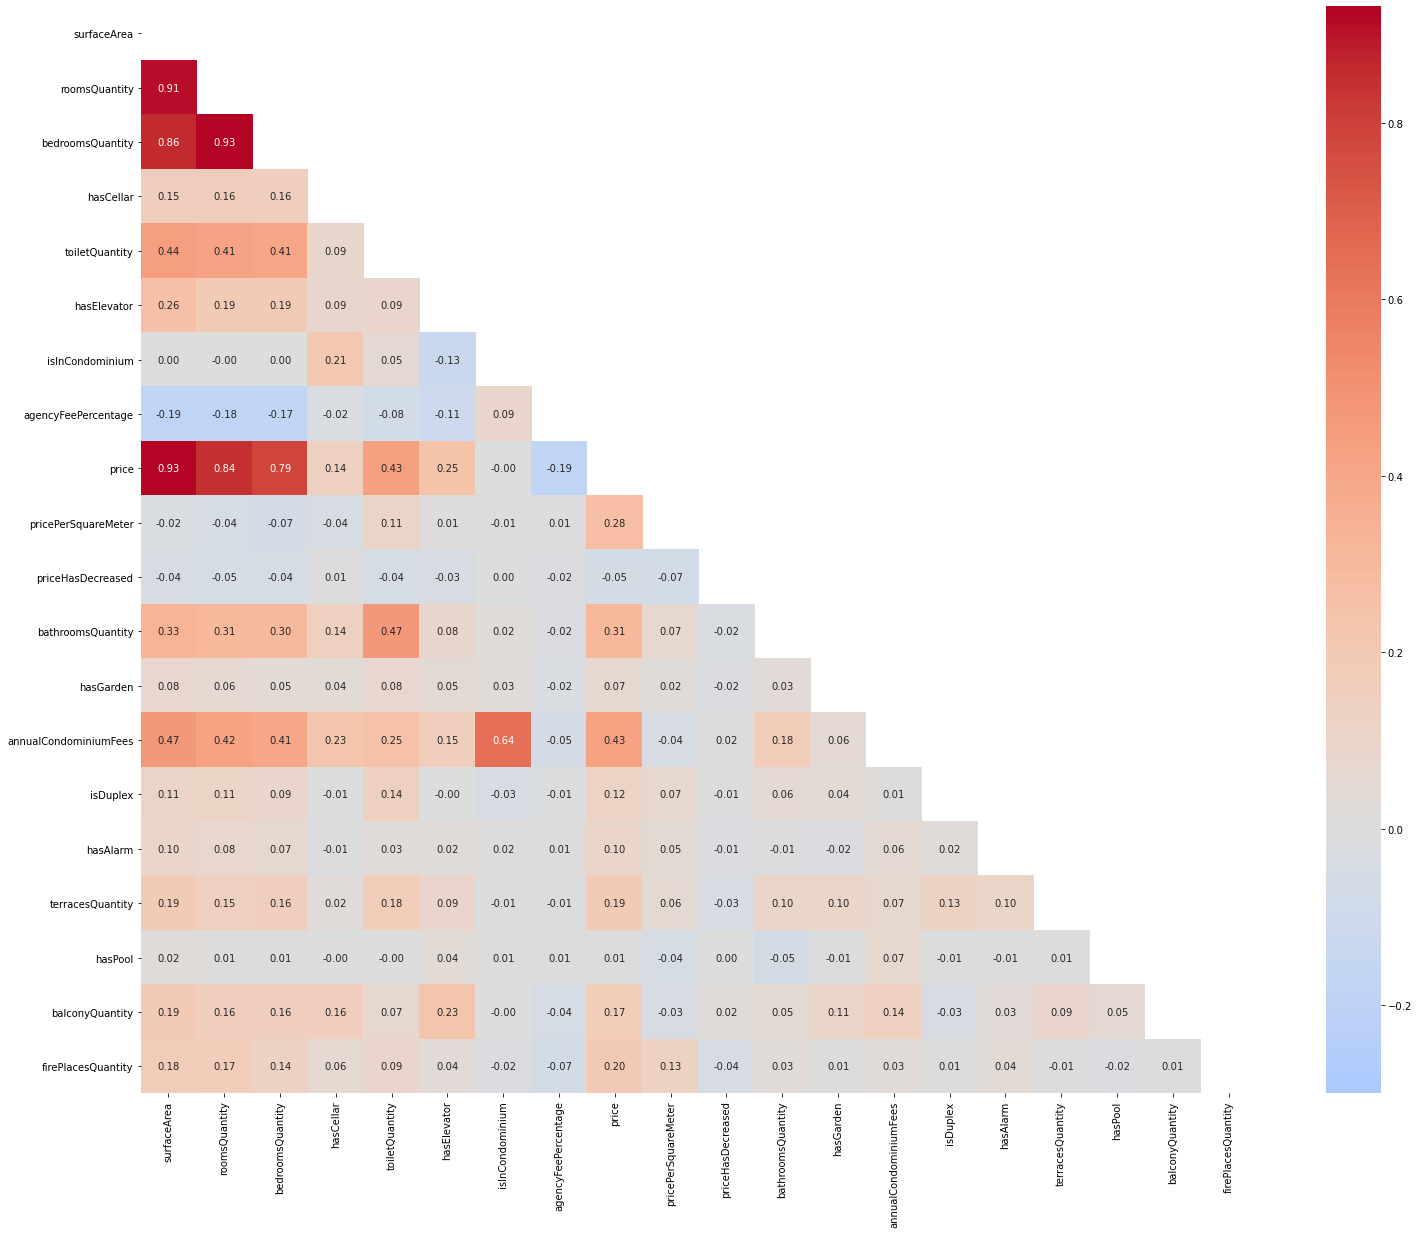

In [116]:
matrix = np.triu(df.corr(method='spearman'))

plt.figure(figsize=(25, 20))

sns.heatmap(df.corr(method='spearman'),
            annot=True,
            fmt='.2f',
            vmin=-0.3,
            center=0,
            cmap='coolwarm',
            mask=matrix)

Сorrelation of price with surface area of the apartment, rooms and bedrooms quantity almost 1. It means that we have multicollinearity in our dataset and it can cause a lot of problems while ML-model building.
Price per square meter on the conterary doesn't have any perceptible coreletion with other features.

## Target variable analysis

For now I am not sure which feature consider as target - price or pricePerSquareMeter. We will see main statistics and probability distribution for both features. 
After plotting and testing hypotheses, we will decide which feature to target and which to remove.

### price

In [117]:
print(f"Quantile 0.25 = {df['price'].quantile(0.25)}")
print(f"Quantile 0.75 = {df['price'].quantile(0.75)}")

print(f"IQR = {df['price'].quantile(0.25), df['price'].quantile(0.75)}")

Quantile 0.25 = 423625.0
Quantile 0.75 = 898925.0
IQR = (423625.0, 898925.0)


In [118]:
print(f"median = {df['price'].median()}")
print(f"mean = {df['price'].mean()}")

median = 615000.0
mean = 778861.8096984515


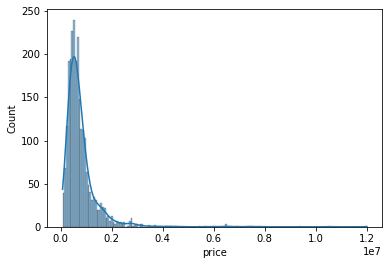

In [119]:
sns.histplot(df['price'], kde=True);

Obviously we have a graph of the non-normal distribution, but still we will conduct a Shapiro Wilk test

In [120]:
test_shapiro = stats.shapiro(df['price'])

print(test_shapiro)

if test_shapiro.pvalue < 0.05:
    print('non-normal distribution')
else:
    print('normal distribution')

ShapiroResult(statistic=0.5743904113769531, pvalue=0.0)
non-normal distribution


Since the distribution is non-normal - we will need to try to normalize it using logarithmic transformations (we will do it in model notebook). 

### pricePerSquareMeter

In [122]:
print(f"Quantile 0.25 = {df['pricePerSquareMeter'].quantile(0.25)}")
print(f"Quantile 0.75 = {df['pricePerSquareMeter'].quantile(0.75)}")

print(
    f"IQR={df['pricePerSquareMeter'].quantile(0.25), df['pricePerSquareMeter'].quantile(0.75)}"
)

Quantile 0.25 = 9394.852135815992
Quantile 0.75 = 11925.156460429374
IQR=(9394.852135815992, 11925.156460429374)


In [123]:
print(f"median = {df['pricePerSquareMeter'].median()}")
print(f"mean = {df['pricePerSquareMeter'].mean()}")

median = 10501.520176893311
mean = 11018.659983733933


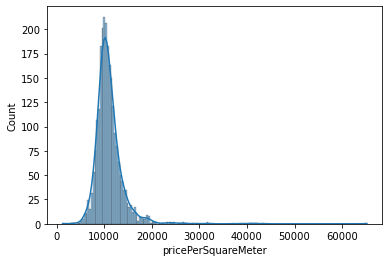

In [124]:
sns.histplot(df['pricePerSquareMeter'], kde=True);

In [125]:
test_shapiro = stats.shapiro(df['pricePerSquareMeter'])

print(test_shapiro)

if test_shapiro.pvalue < 0.05:
    print('non-normal distribution')
else:
    print('normal distribution')

ShapiroResult(statistic=0.7108942866325378, pvalue=0.0)
non-normal distribution


Since the distribution is non-normal - we will need to try to normalize it using logarithmic transformations (we will do it in model notebook).

## Hypotheses

### Price increases with surface are

It is logical and we have seen this correletion on a heatmap graph. Let's look on it more closely to find something interesting 

We will use boxplot graph and 'surfaceArea_bins' to see price difference more visually.
Also it will be interesting to see connection of 'surfaceArea_bins' and 'pricePerSquareMeter' - probably we will see an inverse correlation.

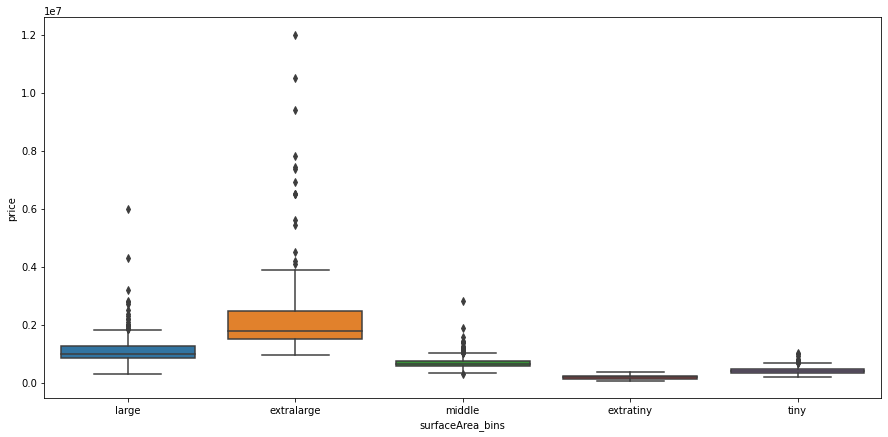

In [126]:
plt.figure(figsize=(15,7))

sns.boxplot(data=df, x='surfaceArea_bins', y='price');

Here everything looks pretty obvious - extralarge appartments will have bigger price, and extratiny - the smalest one

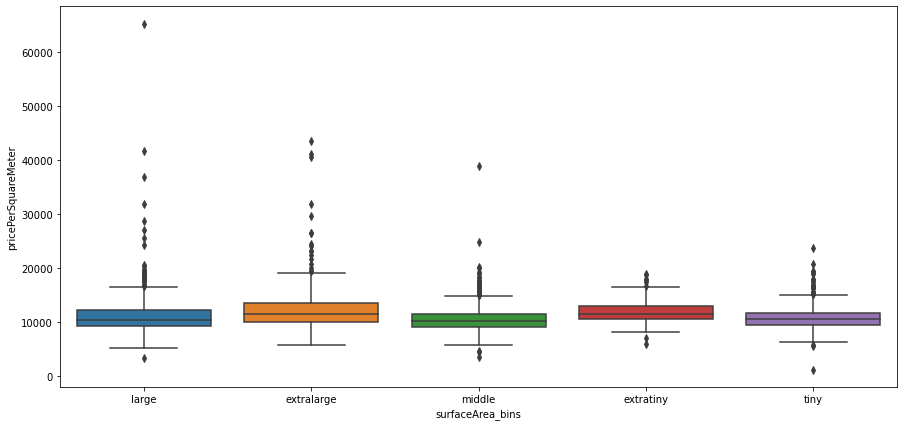

In [127]:
plt.figure(figsize=(15,7))

sns.boxplot(data=df, x='surfaceArea_bins', y='pricePerSquareMeter');

Here result isn't that obvious as previous one - extratiny appartments have the same price per square meter as extralarge ones. Probably there is a big influence of other factors - area, district, different facilities.  

### There are more expensive and less expensive areas and districts

There should be difference in appartments price: 1, 6, 7, 8, 16 areas should be more expensive then other ones. We will  do the analysis, but taking into account the 'surfaceArea_bins' partition 

In [128]:
from IPython.display import Image

In [129]:
display(Image(url='https://www.leparisien.fr/resizer/WfZ3s3sb5JHAUkMCJCmlzjbaUSc=/932x582/cloudfront-eu-central-1.images.arcpublishing.com/leparisien/YYCVB22DENMJTAWNY7JPPXHM7A.jpg', \
             width = 600))

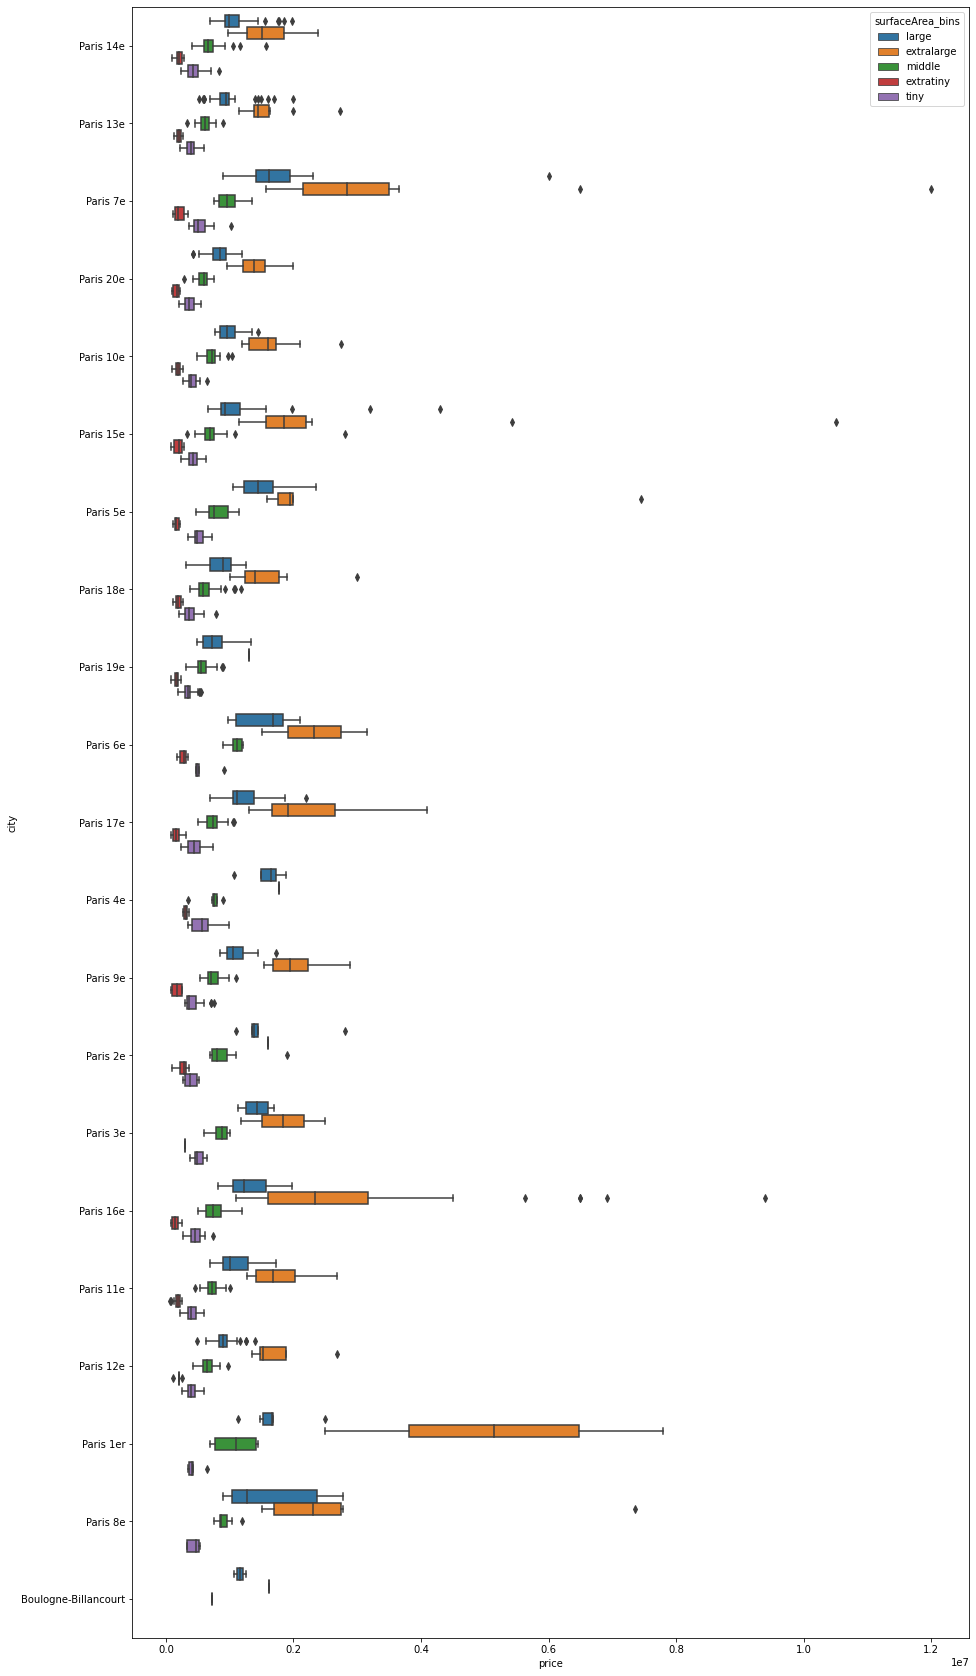

In [130]:
plt.figure(figsize=(15,30))

sns.boxplot(data=df, y='city', x='price', hue='surfaceArea_bins', orient='h');

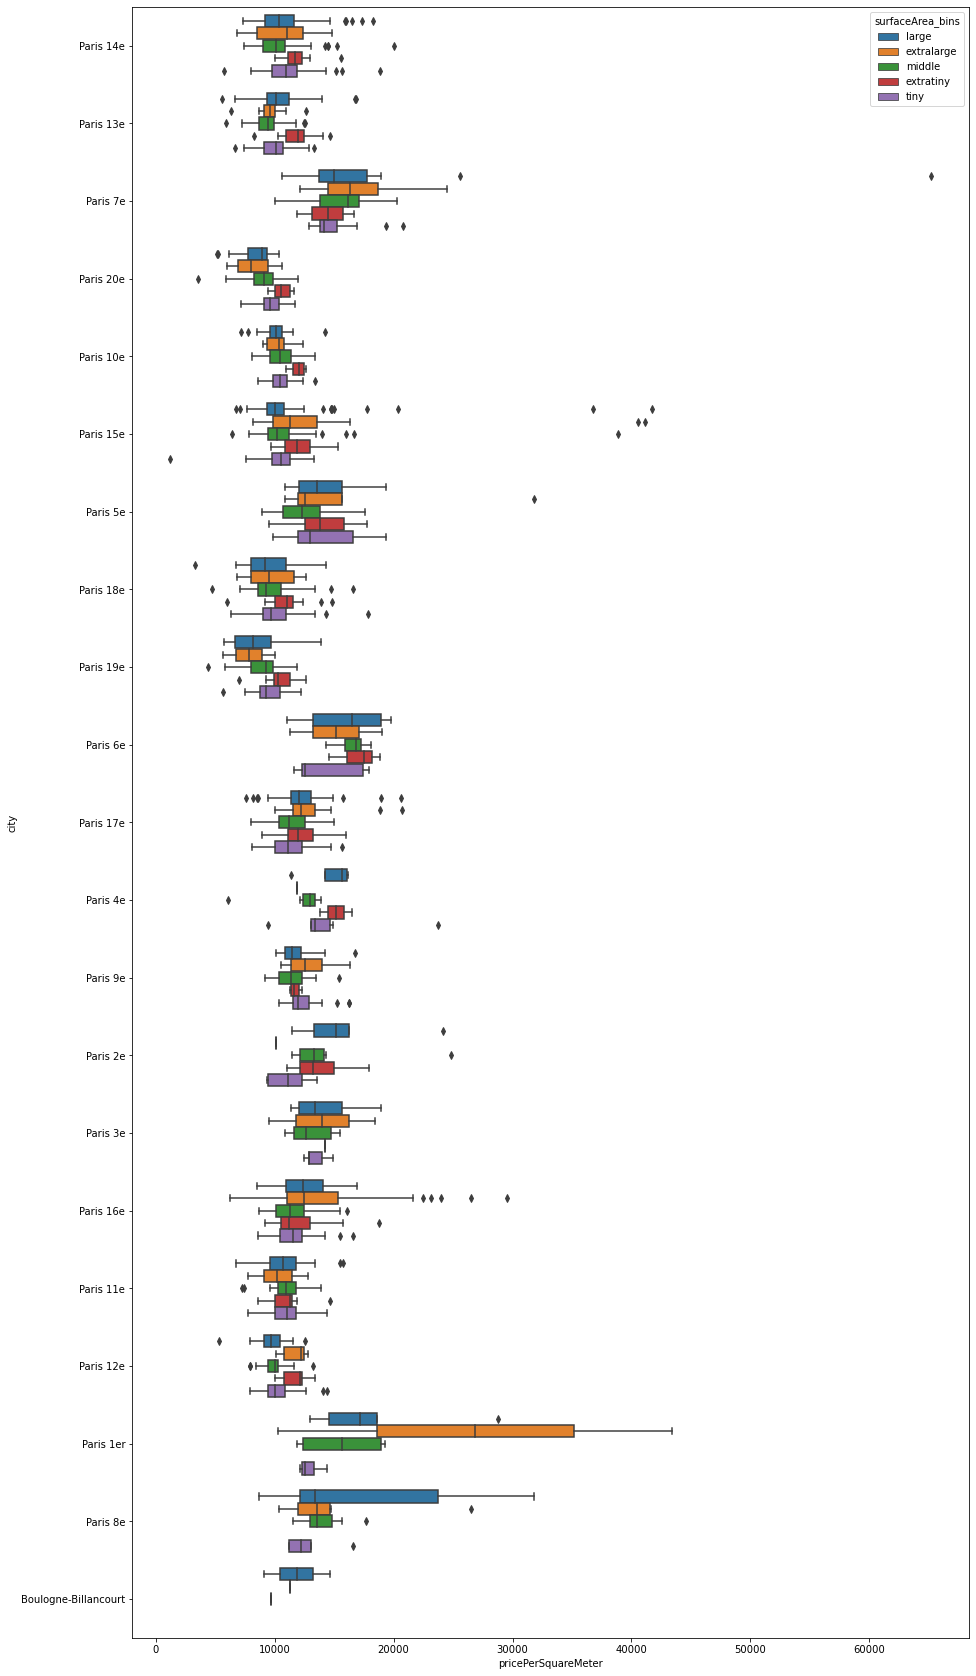

In [131]:
plt.figure(figsize=(15,30))

sns.boxplot(data=df, y='city', x='pricePerSquareMeter', hue='surfaceArea_bins', orient='h');

The most expensive areas are : 1 and 8 area,
Less expensive but still expensive: 7 area,
Then 6 and 5 area.

16 area isn t expensive but probably because area is quite big: there is a big difference between 16 North (very expensive) and 16 South (not expensive).

### Apartments in 'old' buildings should be more expensive then in a 'new' ones

<AxesSubplot:xlabel='price', ylabel='surfaceArea_bins'>

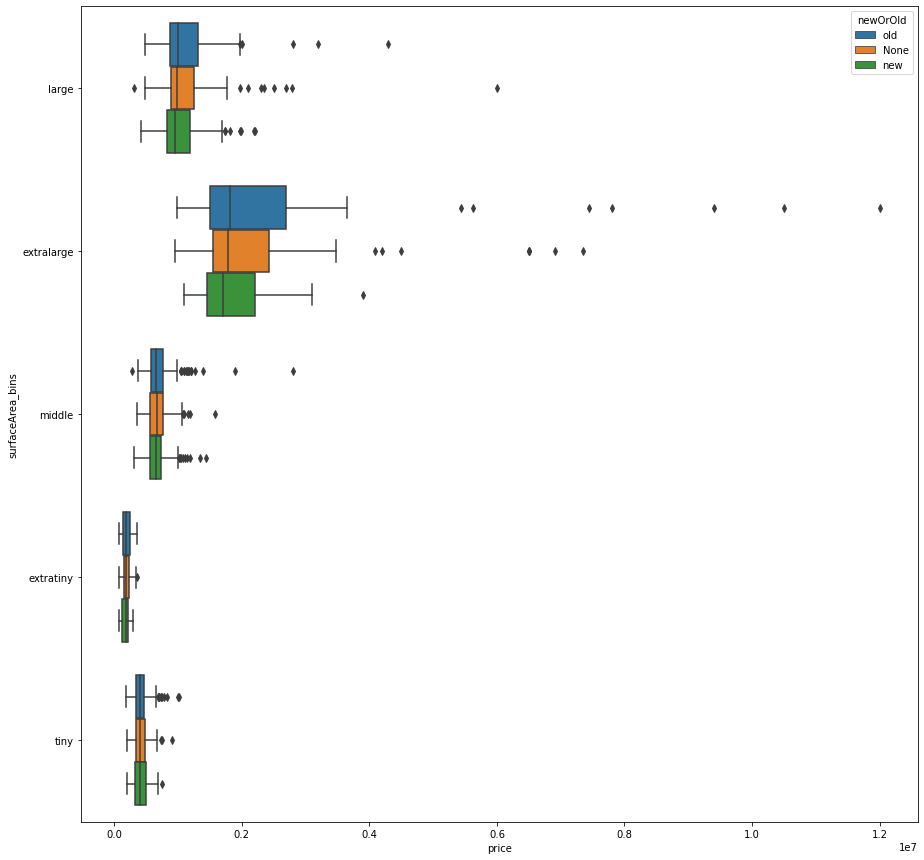

In [132]:
plt.figure(figsize=(15, 15))

sns.boxplot(data=df,
            y='surfaceArea_bins',
            x='price',
            hue='newOrOld',
            orient='h')

<AxesSubplot:xlabel='pricePerSquareMeter', ylabel='surfaceArea_bins'>

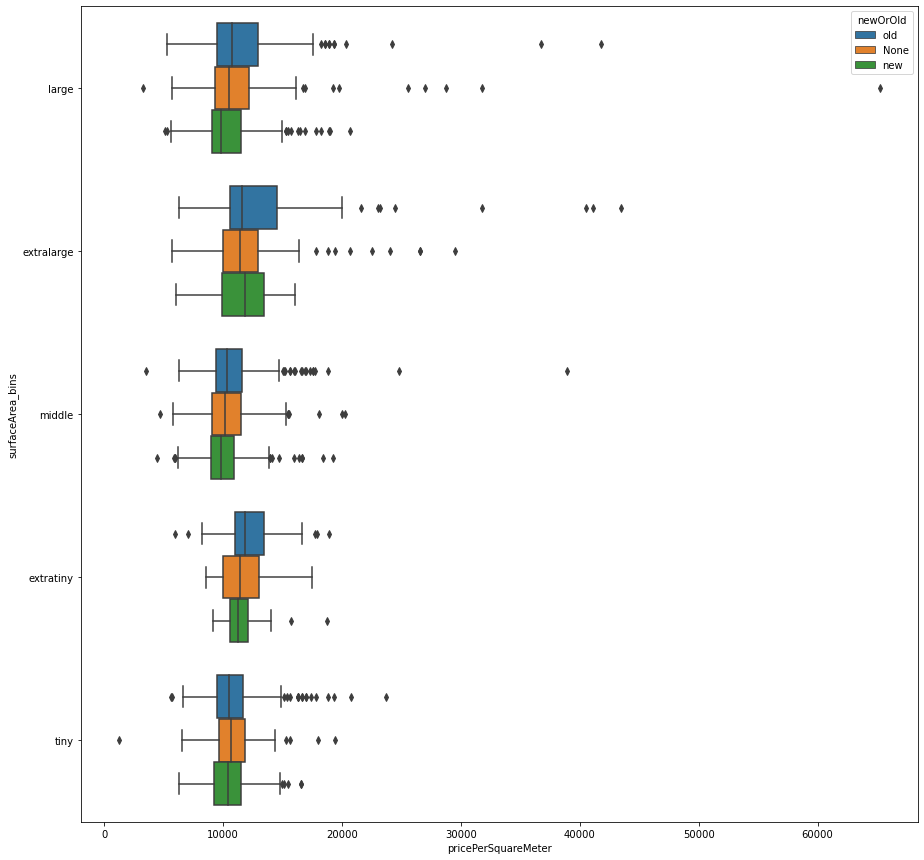

In [133]:
plt.figure(figsize=(15, 15))

sns.boxplot(data=df,
            y='surfaceArea_bins',
            x='pricePerSquareMeter',
            hue='newOrOld',
            orient='h')

It looks like there is no such a big difference in price but still apartments in buildings constructed before 1900s are little bit more expensive

### Terrace/ balcony/ firepleces will increase price per square meter 

<AxesSubplot:xlabel='pricePerSquareMeter', ylabel='surfaceArea_bins'>

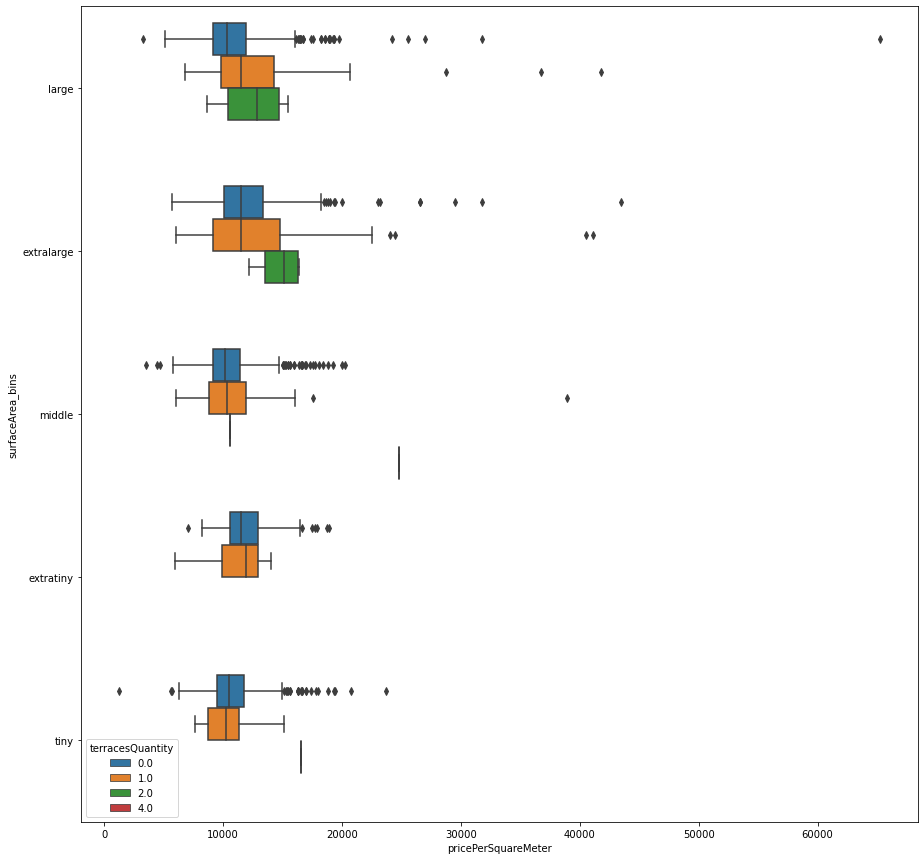

In [134]:
plt.figure(figsize=(15, 15))

sns.boxplot(data=df,
            y='surfaceArea_bins',
            x='pricePerSquareMeter',
            hue='terracesQuantity',
            orient='h')

<AxesSubplot:xlabel='pricePerSquareMeter', ylabel='surfaceArea_bins'>

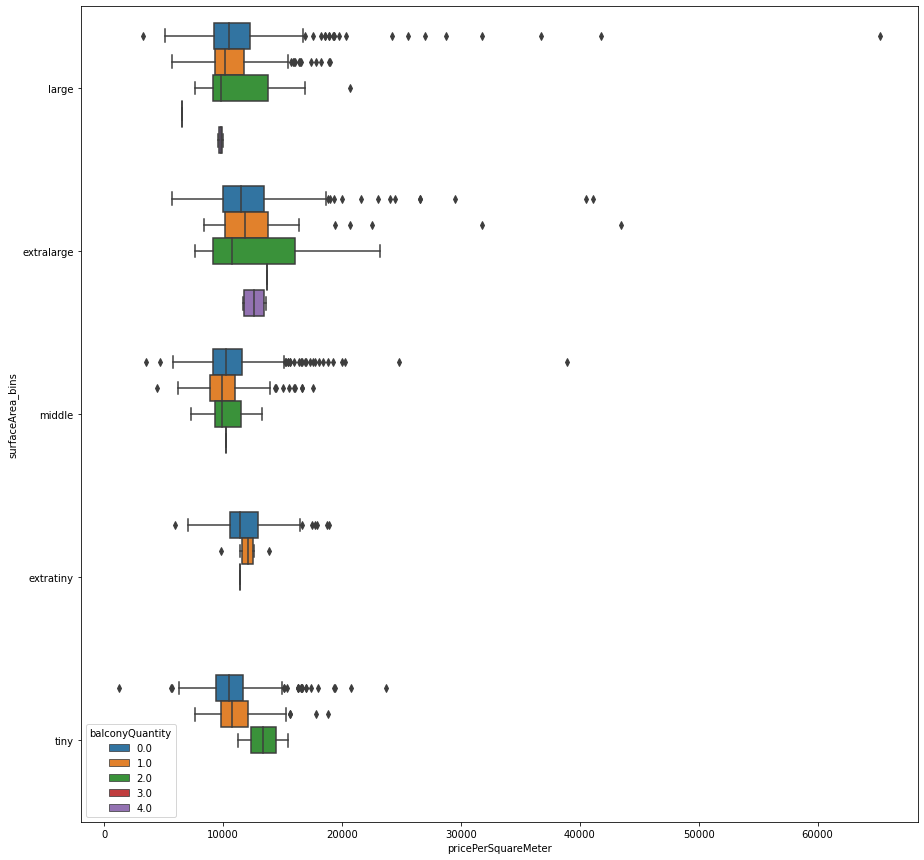

In [135]:
plt.figure(figsize=(15, 15))

sns.boxplot(data=df,
            y='surfaceArea_bins',
            x='pricePerSquareMeter',
            hue='balconyQuantity',
            orient='h')

<AxesSubplot:xlabel='pricePerSquareMeter', ylabel='surfaceArea_bins'>

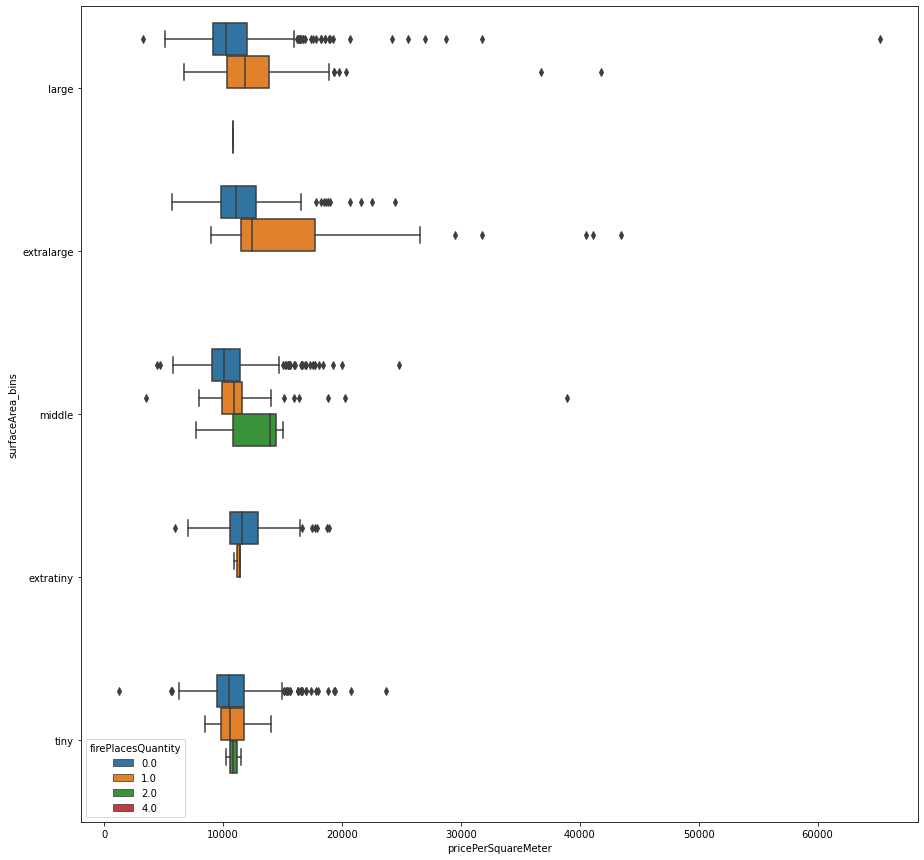

In [136]:
plt.figure(figsize=(15, 15))

sns.boxplot(data=df,
            y='surfaceArea_bins',
            x='pricePerSquareMeter',
            hue='firePlacesQuantity',
            orient='h')

Our hypothese was right - terrace / balcony/ fireplces increase apartment price

# Conclusion

If we use 'price' as a target feature - as the result we will probably get an overfitted linear regression model. Because 'price' has a very strong coreletion with surfaceArea (and, consequently, with other connected features) our model will ignore other features which, in reality, aggregated can play a 'gamechanging' role. 
That's why as target I prefer to use 'pricePerSquareMeter' - it will probably badly work as a linear model, but may be more accurate with decision trees or boostings.
But, as an experiment, while building baseline ML-model - I will try to use both 'price' and 'pricePerSquareMeter' separatly, and see which ML-model will work better.

In [139]:
df.to_csv(
    '/Users/macbook/Desktop/DataScience/Pymagic/pet-project - 1/data/processed_data.csv',
    index=0)